## Naive Bayes on News aggregator dataset


The dataset that I chose is the News Aggregator Dataset, available on Kaggle. The News aggregator dataset can provide a wealth of diverse text data that can be used for wide range of NLP tasks such as text analysis, sentiment analysis, topic modelling etc. It includes collection of news from the year 2014(March 10 - August 10). The data is obtained from various news sources such as Reuters, CNN, etc. and it contains headlines, URLS and categories of new stories.
The features in the dataset are 

title: Denotes the headlines or title of the news article

URL: link to the news article

Publisher: the news agency that published the article

hostname: the main website where news article is published

Category : the category of the news item; one of:
-- b : business
-- t : science and technology
-- e : entertainment
-- m : health

STORY : alphanumeric ID of the news story that the article discusses

TIMESTAMP : approximate timestamp of the article's publication, given in Unix time (seconds since midnight on Jan 1, 1970)

It was collected by a web aggregator. The different news categories in the dataset include business, science and technology, entertainment and health.


### Research question

The reasearch question that the problem set will try to answer is *'With how much accuracy can we predict the category of news article based on its title and publisher'* The categories in the dataset include business, science and technology, entertainment, and health. I will be using Naive Bayes algorithm for this. Naive Bayes is supervised learning algorithm. It is useful for handling text datasets and works by calculating probability of each class based on the input feature and predicts the class with the highest probability

### **Why is this algorithm a good way of answering your research question? (2pts)**

Naive Bayes is a probabilistic algorithm that uses Bayes theorem to calculate the probability. Naive Bayes makes a naive assumption that all the features are independent of each other, which means that it assumes that the presence of one feature does not affect the probability of the other features, this allows to model the condiitonal probability of class given the features using the Bayes theorem. 
Naive Bayes is commonly used for text classification of high dimensional data, additionally it is relatively robust to overfitting.

### **Using the data you chose and the algorithm you chose, read in your data and run your model. **

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

*Reading the data*

In [3]:
#Read Data
df=pd.read_csv('uci-news-aggregator.csv')
print(df.shape)

#Displaying few records of the dataset
df.head()




(422419, 8)


,ID,TITLE,URL,PUBLISHER,CATEGORY,STORY,HOSTNAME,TIMESTAMP
0,1,"Fed official says weak data caused by weather,...",http://www.latimes.com/business/money/la-fi-mo...,Los Angeles Times,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.latimes.com,1394470370698
1,2,Fed's Charles Plosser sees high bar for change...,http://www.livemint.com/Politics/H2EvwJSK2VE6O...,Livemint,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.livemint.com,1394470371207
2,3,US open: Stocks fall after Fed official hints ...,http://www.ifamagazine.com/news/us-open-stocks...,IFA Magazine,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.ifamagazine.com,1394470371550
3,4,"Fed risks falling 'behind the curve', Charles ...",http://www.ifamagazine.com/news/fed-risks-fall...,IFA Magazine,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.ifamagazine.com,1394470371793
4,5,Fed's Plosser: Nasty Weather Has Curbed Job Gr...,http://www.moneynews.com/Economy/federal-reser...,Moneynews,b,ddUyU0VZz0BRneMioxUPQVP6sIxvM,www.moneynews.com,1394470372027


*Checking for missing values*

In [4]:
#Check if there are missing values
print("NA values in title column:",df['TITLE'].isna().sum())
print("NA values in publisher column:",df['PUBLISHER'].isna().sum())

#Fill in the missing values
print("After filling NA values")
df["PUBLISHER"].fillna('', inplace=True)
print(df['PUBLISHER'].isna().sum())

NA values in title column: 0
NA values in publisher column: 2
After filling NA values
0


*Preprocessing the data and building the model*

In [5]:
#Running the model

from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

stemmer=PorterStemmer()
stop_words=set(stopwords.words('english'))

def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = ' '.join([stemmer.stem(word) for word in text.split() if word not in stop_words])  # Stemming and stopword removal
    return text
   

df['TITLE']=df['TITLE'].apply(preprocess_text)
df['PUBLISHER']=df['PUBLISHER'].apply(preprocess_text)

df['TEXT']=df['TITLE']+" "+df['PUBLISHER']

X_train, X_test, y_train, y_test = train_test_split(df["TEXT"], df["CATEGORY"], test_size=0.2, random_state=42)

vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)





In [9]:
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_vec, y_train)

y_pred = nb_classifier.predict(X_test_vec)

print(y_test[:10])
print("\n Predicted labels:")
print(y_pred[:10])

# Evaluating accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("\nAccuracy:", accuracy*100)

280241    e
96315     b
280410    e
284975    e
379072    m
233281    e
77308     t
363221    e
247498    b
176734    t
Name: CATEGORY, dtype: object

 Predicted labels:
['e' 'b' 'e' 'e' 'b' 't' 't' 'e' 'b' 't']

Accuracy: 89.90223000804886


In [10]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[20830   649   252  1683]
 [  591 29022   167   573]
 [  710   646  7374   294]
 [ 1954   771   241 18727]]


### Tinkering with parameters

##### 1) *Tinkering with maximum number of features*

In [11]:
vectorizer = TfidfVectorizer(max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

nb_classifier_1 = MultinomialNB()
nb_classifier_1.fit(X_train_vec, y_train)

y_pred_1 = nb_classifier_1.predict(X_test_vec)



##### 2) *Using different Vectorizer*

In [12]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

nb_classifier_2 = MultinomialNB()
nb_classifier_2.fit(X_train_vec, y_train)

y_pred_2 = nb_classifier_2.predict(X_test_vec)




##### 3)*Varying alpha value*

In [13]:
nb_classifier_3 = MultinomialNB(alpha=1)
nb_classifier_3.fit(X_train_vec, y_train)

y_pred_3 = nb_classifier_3.predict(X_test_vec)

accuracy_3=accuracy_score(y_test,y_pred_3)
print("\nAccuracy with alpha 1:",accuracy_3*100)


Accuracy with alpha 1: 92.03872922683584


In [14]:
nb_classifier_4 = MultinomialNB(alpha=10)
nb_classifier_4.fit(X_train_vec, y_train)
y_pred_4 = nb_classifier_4.predict(X_test_vec)



### Report the accuracy of  model. Either through RMSE or another metric. How did accuracy change with your parameter tinkering? 

In [11]:
#For model1 
accuracy_1 = accuracy_score(y_test, y_pred_1)
print("Accuracy with 5000 features:", accuracy_1*100)


#For model2 
accuracy_2 = accuracy_score(y_test, y_pred_2)
print("\nAccuracy with CountVectorizer:", accuracy_2*100)

#For model4
accuracy_4 = accuracy_score(y_test, y_pred_4)
print("\nAccuracy with alpha=10 :", accuracy_4*100)

Accuracy with 5000 features: 89.90223000804886

Accuracy with CountVectorizer: 92.03872922683584

Accuracy with alpha=10 : 90.57809762795323


### Create a visualization demonstrating your findings. 

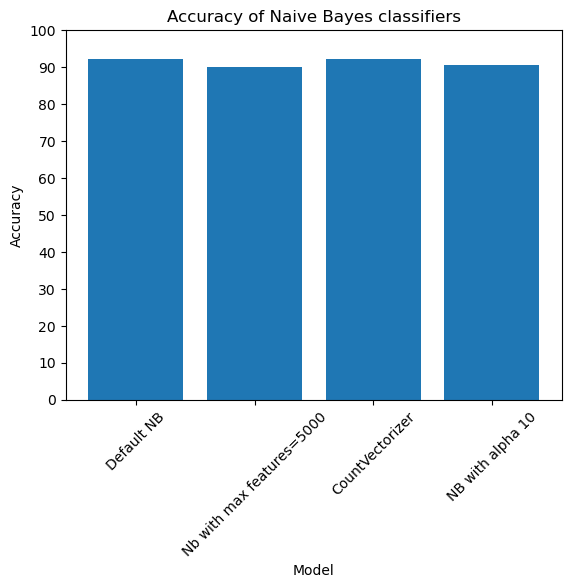

In [51]:
import matplotlib.pyplot as plt

# Create a list of the accuracies
accuracies = [accuracy*100, accuracy_1*100,accuracy_2*100, accuracy_4*100]

# Create a list of the model names
models = ["Default NB", "Nb with max features=5000","CountVectorizer","NB with alpha 10"]

# Create a bar plot
plt.bar(models, accuracies)

# Add title and axis labels
plt.title("Accuracy of Naive Bayes classifiers")
plt.xlabel("Model")
plt.ylabel("Accuracy")



# Set y-axis range to 0-100 with steps of 10
plt.yticks(range(0, 101, 10))
plt.xticks(rotation=45)
# Show the plot
plt.show()





The bar graph shows the accuracy of the tinkered models with respect to the default naive bayes model. We can see that the Naive bayes model with count vectorizer has the highest accuracy but it is comparable to the default naivebayes with tfidf vectorizer. The model shows less accuracy with tfidf vectorizer and with max features=5000. 

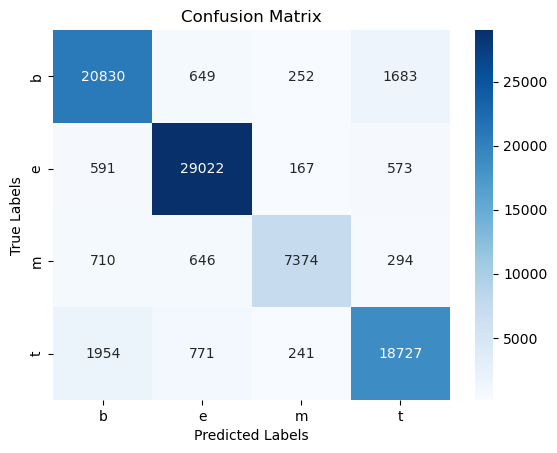

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute confusion matrix as per model1
cm = confusion_matrix(y_test, y_pred)

# Create heatmap
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d", xticklabels=nb_classifier.classes_, yticklabels=nb_classifier.classes_)

plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


Above is the depiction of the confusion matrix for various categories of the news, on the right side we see the total number of onservations for each category.The x-axis of the heatmap will represent the predicted labels, and the y-axis will represent the true labels. The values in the diagonal of the matrix represent the number of correctly classified samples, while the off-diagonal values represent the misclassified samples. The color intensity of each cell represents the frequency of samples classified as such.

###  Challenges faced

Some of the challenges that I ran into in the problem set were as follow, most of these problems were faced due to the dataset

1)Handling out of vocabulary words : Some of the words in the dataset were not being able to be handled properly for the naive bayes. Hence I used stemmer to overcome the issue and convert the words into their root form

2)Choosing the right feature : Choosing the correct feature is critical to Naive Bayes, there were different features to select from, but for the research question I tried to choose 2 features which seemed most relevant

3)Text data can usually be sparse which means that there can be words with low frequencies which can lead to high number of 0 probabilities in naive bayes. To overcome this smoothing parameter alpha can be used ( which is doen in the tinkering section)

4)Imbalance in news categories : some categories of news may have more data than others which can affect the model being biased and performing poorly on minority class. To overcome this oversampling the minortiy class or undersampling the majority class can be tried out.




### Further notes

The potential benefits of the above Naive Bayes model built for news aggregator dataset are:

1) Personalization : Model could be used to personalize news feeds for users which could in turn help business to deliver updated news and related content for users.

2) Faster news curation:  Model can categorize news articles saving time and effort for human curators, this will be usefull for organizations that process high volumne of news articles every day.

Potential Harms of the model

1) The dataset may contain biases and stereotypes that the model could serve to perpetuate.For instance, the model may falsely label similar items as "crime" even if they are unrelated to low-income locations if the dataset contains an excessive amount of news articles concerning crime in low-income areas. This could potentially perpetuate bias and contribute to much larger problems

2) Lack of context :  Without taking into account other crucial elements like the author's tone and intent, the historical context of the incident being reported, and any potential biases of the news source, the model is trained exclusively on the text content of the article. The model's classification of news articles into categories such as politics, business, and entertainment may not always accurately reflect the full complexity and nuance of the news.Depending on the article's subject, a piece about climate change, for instance, might be categorized as science or politics, but this categorization might not adequately convey the issue's importance and urgency.

### Future work

Another research question for future work could be - Can accuracy of the model be improved by incorportating additional contextual information like location,sentiment analysis or topic modelling or other preprocessing techniques affect the accuracy or performance of the model. Understanding the impact of the techniques can help optimize and improve the performance of the models. Many time in preprocessing the context and tone of the news article is lost, using sentiment analysis the tone of news article can be included which could provide valuable insights into how different emotions may affect the likelihood of a news article being classified into a certain category. We might be able to better the classifier's performance by identifying the major themes or subjects in the news articles with the use of key modeling.